In [1]:
import matplotlib.pyplot as plt
import torch
from curlyBrace import curlyBrace

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [3]:
loc_rand = torch.randn((25, 25)) * 0.2
loc_rand.shape

torch.Size([25, 25])

In [4]:
loc_rand2 = torch.randn((25, 25)) * 0.2
loc_rand2.shape

torch.Size([25, 25])

In [5]:
blocs = torch.block_diag(
    torch.ones((4, 4)),
    torch.ones((6, 6)),
    torch.ones((4, 4)),
    torch.ones((6, 6)),
    torch.ones((5, 5)),
)
blocs.shape

torch.Size([25, 25])

In [6]:
blocs2 = torch.block_diag(
    torch.ones((6, 6)),
    torch.ones((4, 4)),
    torch.ones((5, 5)),
    torch.ones((3, 3)),
    torch.ones((7, 7)),
)
blocs2.shape

torch.Size([25, 25])

In [7]:
loc = blocs + loc_rand

In [8]:
loc2 = blocs2 + loc_rand2

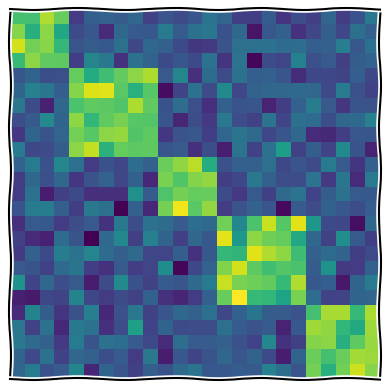

In [9]:
with plt.xkcd():
    fig, ax = plt.subplots()
    ax.matshow(loc)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [10]:
odor_diag = torch.zeros(3, 3)
odor_diag.fill_diagonal_(1)
odor_diag

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [11]:
# odor_rand = torch.randn((3, 3)) * 0.2
odor_rand = torch.zeros((3, 3))
odor_rand

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [12]:
odor = odor_diag + odor_rand
odor

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

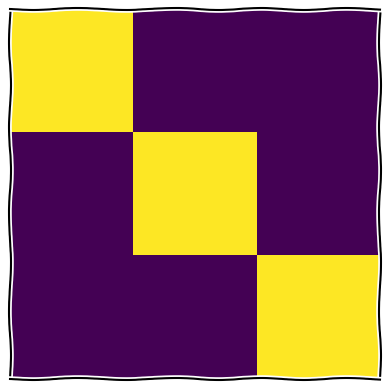

In [13]:
with plt.xkcd():
    fig, ax = plt.subplots()
    ax.matshow(odor)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [14]:
odor_loc = torch.randn((25, 3))
odor_loc.T

tensor([[-0.2507,  0.4272,  0.5209, -0.8399, -0.0791, -0.5684,  0.4701,  0.9853,
         -0.6190, -0.7217, -1.8031,  0.9796,  0.8400,  0.5453,  0.8783, -0.5106,
         -0.0942,  0.7332, -0.9026, -1.6916,  0.0787,  0.2191,  0.6926,  1.2226,
         -0.3792],
        [-1.3503,  0.6547, -0.5736,  0.0492, -0.3740,  0.9608,  0.7497, -0.7227,
         -0.0771,  1.0014, -1.3430,  0.9587, -1.6833, -0.0157, -0.6303,  0.4620,
          0.5887, -1.6689,  0.1719, -0.8877, -0.3096,  0.0666, -0.3949,  0.4222,
         -0.1475],
        [ 0.5633, -0.3461, -1.3683,  0.2900,  0.1720,  0.4344,  2.1500,  1.6246,
          0.6548, -0.7591,  1.3042, -0.6682,  0.6644,  0.9770,  0.2460, -1.0407,
          0.1162,  0.5419, -0.2620, -0.7459, -0.0925,  0.6483, -1.4626, -0.3353,
         -0.5485]])

In [15]:
odor_loc2 = torch.randn((25, 3))

In [16]:
tmp_mat1 = torch.cat((loc, odor_loc), dim=1)
tmp_mat1.shape

torch.Size([25, 28])

In [17]:
tmp_mat2 = torch.cat((odor_loc.T, odor), dim=1)
tmp_mat2.shape

torch.Size([3, 28])

In [18]:
neural = torch.cat((tmp_mat1, tmp_mat2), dim=0)
neural.shape

torch.Size([28, 28])

In [19]:
simu = torch.cat(
    (torch.cat((loc2, odor_loc2), dim=1), torch.cat((odor_loc2.T, odor), dim=1)), dim=0
)
simu.shape

torch.Size([28, 28])

In [20]:
braces = []
braces.append(
    {
        "p1": [-2, 0],
        "p2": [-2, 24],
        "str_text": "location",
    }
)
braces.append(
    {
        "p1": [-2, 25],
        "p2": [-2, 27],
        "str_text": "odor",
    }
)
braces.append(
    {
        "p1": [0, -2],
        "p2": [24, -2],
        "str_text": "location",
    }
)
braces.append(
    {
        "p1": [25, -2],
        "p2": [27, -2],
        "str_text": "odor",
    }
)

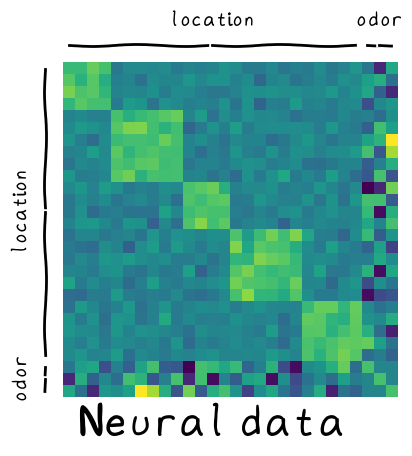

In [21]:
with plt.xkcd():
    fig, ax = plt.subplots()
    ax.matshow(neural)
    ax.set_xticks([])
    ax.set_yticks([])
    # ax.set_xlabel('time')
    ax.set_xlabel("Neural data", fontsize=30)
    # ax.set_title("Neural data")

    for spine in ax.spines.values():
        spine.set_visible(False)

    for idx, brace in enumerate(braces):
        curlyBrace(
            fig=fig,
            ax=ax,
            p1=brace["p1"],
            p2=brace["p2"],
            k_r=0.0,
            bool_auto=False,
            str_text=brace["str_text"],
            color="black",
            lw=2,
            int_line_num=2,
        )

    plt.show()

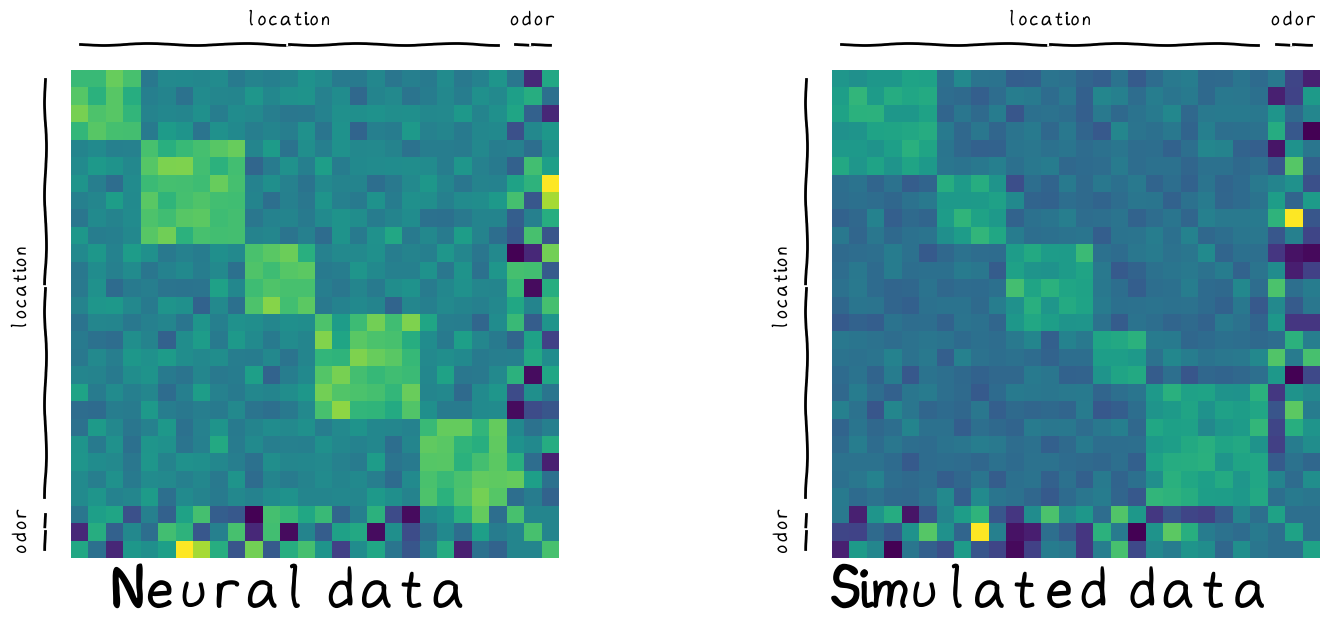

In [22]:
with plt.xkcd():
    fig, ax = plt.subplots(1, 2, figsize=(18, 7))
    ax[0].matshow(neural)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    # ax.set_ylabel('my overall health')
    # ax[0].set_title("Neural data", fontsize=40)
    ax[0].set_xlabel("Neural data", fontsize=40)
    for spine in ax[0].spines.values():
        spine.set_visible(False)

    ax[1].matshow(simu)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    # ax[1].set_title("Simulated data", fontsize=40)
    ax[1].set_xlabel("Simulated data", fontsize=40)
    for spine in ax[1].spines.values():
        spine.set_visible(False)

    for axi in ax:
        for idx, brace in enumerate(braces):
            curlyBrace(
                fig=fig,
                ax=axi,
                p1=brace["p1"],
                p2=brace["p2"],
                k_r=0.0,
                bool_auto=False,
                str_text=brace["str_text"],
                color="black",
                lw=2,
                int_line_num=2,
            )

    plt.show()